# **1. Nerual Network**




Deep Neural Network (DNN)  
Full connected Nerual Network(FNN)  
Feedforward Nerual Network(FNN)  
Artificial Nerual Network(ANN)  


# **2.Tensorflow.Keras**





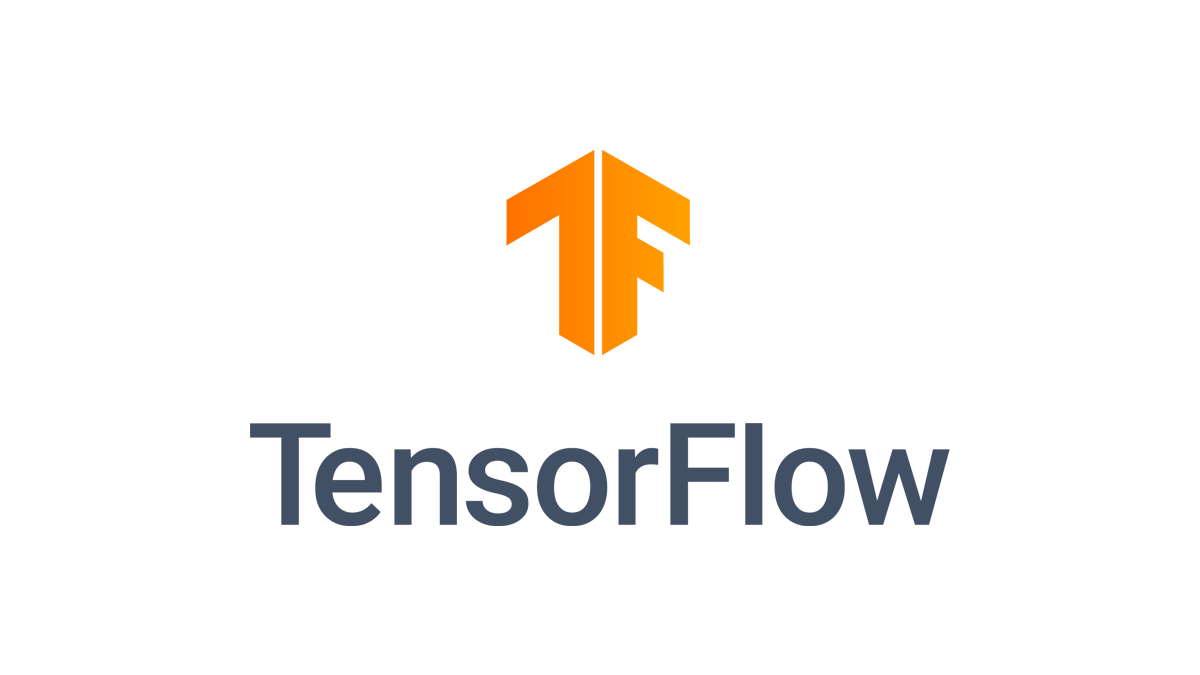

### **a. Introduction**



**Deep learning for humans.**


Keras is an API designed for human beings, not machines. Keras follows best practices for reducing cognitive load: it offers consistent & simple APIs, it minimizes the number of user actions required for common use cases, and it provides clear & actionable error messages. It also has extensive documentation and developer guides.




### **b. Basic Process and key methods**

#### **I.   Define/build the model**  





Keras Sequential model:   
A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.  


We can create a Sequential model by passing a list of layers to the Sequential constructor:



```
model = keras.Sequential(
    [
        layers.Dense(4, activation="relu", input_shape=[3]),
        layers.Dense(1),
    ]
)
```
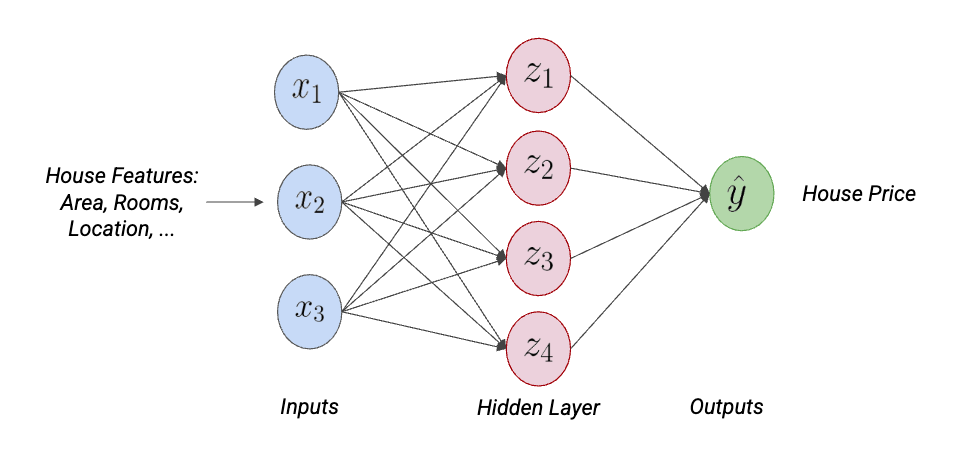



#### **II.  Compile the model**


  

Configures the model for training.

```
compile(
    optimizer='rmsprop',
    loss=None,
    metrics=None,
    loss_weights=None,
    weighted_metrics=None,
    run_eagerly=None,
    steps_per_execution=None,
    jit_compile=None,
    **kwargs
)
```

Example:

```
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives()])
```





#### **III. Fit/Train the model**  


Trains the model for a fixed number of epochs (iterations on a dataset).



```
fit(
    x=None,
    y=None,
    batch_size=None,
    epochs=1,
    verbose='auto',
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False
)
```

Example:

```
model.fit(X_train, y_train, epochs=1000, verbose=0, validation_split=0.1)
```





#### **IV.  Evaluate the model**  




Returns the loss value & metrics values for the model in test mode.



```
evaluate(
    x=None,
    y=None,
    batch_size=None,
    verbose='auto',
    sample_weight=None,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
    return_dict=False,
    **kwargs
)
```

Example:

```
model.evaluate(X_test, y_test)
```




#### **V.   Make predictions**

Generates output predictions for the input samples.

```
predict(
    x,
    batch_size=None,
    verbose='auto',
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False
)
```

Example:

```
model.predict(X_test)
```





# **3. FNN in Keras code example**



Boston Housing prices prediction

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. 

In general, this dataset uses 13 attributes about houses to predict house prices, which is a regression problem.

**import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import keras
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler

**Import the dataset**

In [2]:
# import the dataset
(train_features, train_labels), (test_features, test_labels) = boston_housing.load_data()
print(train_features.shape)
print(test_features.shape)
# print(type(pd.DataFrame(train_features)))
pd.DataFrame(train_features).head()

57026/57026 [==============================] - 0s 0us/step
(404, 13)
(102, 13)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


**Data Preprocessing - Normalization**

In [3]:
train_mean = np.mean(train_features, axis=0)
train_std = np.std(train_features, axis=0)
train_features_scaled = (train_features - train_mean) / train_std
pd.DataFrame(train_features_scaled).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.272246,-0.483615,-0.435762,-0.256833,-0.165227,-0.176443,0.813062,0.116698,-0.626249,-0.595170,1.148500,0.448077,0.825220
1,-0.403427,2.991784,-1.333912,-0.256833,-1.215182,1.894346,-1.910361,1.247585,-0.856463,-0.348433,-1.718189,0.431906,-1.329202
2,0.124940,-0.483615,1.028326,-0.256833,0.628642,-1.829688,1.110488,-1.187439,1.675886,1.565287,0.784476,0.220617,-1.308500
3,-0.401494,-0.483615,-0.869402,-0.256833,-0.361560,-0.324558,-1.236672,1.107180,-0.511142,-1.094663,0.784476,0.448077,-0.652926
4,-0.005634,-0.483615,1.028326,-0.256833,1.328612,0.153642,0.694808,-0.578572,1.675886,1.565287,0.784476,0.389882,0.263497


In [4]:
scaler = StandardScaler()

train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.fit_transform(test_features)

pd.DataFrame(train_features_scaled).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.272246,-0.483615,-0.435762,-0.256833,-0.165227,-0.176443,0.813062,0.116698,-0.626249,-0.595170,1.148500,0.448077,0.825220
1,-0.403427,2.991784,-1.333912,-0.256833,-1.215182,1.894346,-1.910361,1.247585,-0.856463,-0.348433,-1.718189,0.431906,-1.329202
2,0.124940,-0.483615,1.028326,-0.256833,0.628642,-1.829688,1.110488,-1.187439,1.675886,1.565287,0.784476,0.220617,-1.308500
3,-0.401494,-0.483615,-0.869402,-0.256833,-0.361560,-0.324558,-1.236672,1.107180,-0.511142,-1.094663,0.784476,0.448077,-0.652926
4,-0.005634,-0.483615,1.028326,-0.256833,1.328612,0.153642,0.694808,-0.578572,1.675886,1.565287,0.784476,0.389882,0.263497


 **Define/build the model**

Check the input shape

In [5]:
print(len(train_features_scaled[0]))
print(train_features_scaled.shape[1])

feature_number = len(train_features_scaled[0])

13
13


build model

In [6]:
model = keras.Sequential([
                          Dense(20, activation='relu', input_shape=[len(train_features[0])]),
                          Dense(1)
])

**Compile the model**

In [7]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse', 'mae'])

**Fit/Train the model**

In [8]:
history = model.fit(train_features_scaled, train_labels, epochs=1000, verbose=0, validation_split=0.1)

**Evaluate the model**

In [9]:
model.evaluate(test_features_scaled, test_labels)

4/4 [==============================] - 0s 4ms/step - loss: 14.8154 - mse: 14.8154 - mae: 2.5322


[14.815434455871582, 14.815434455871582, 2.532191514968872]

Visualize the training process(plot Epoch vs Loss curve)

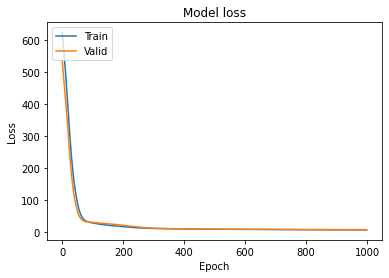

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

**Make predictions**

In [11]:
pred_test_labels = model.predict(test_features_scaled)

4/4 [==============================] - 0s 3ms/step


Plot true price value and predict price value 

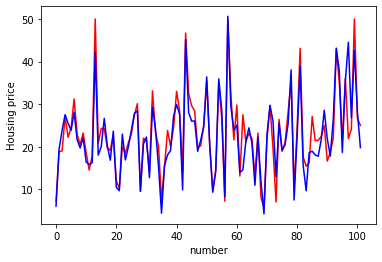

In [12]:
import matplotlib.pyplot as plt
plt.plot(range(len(test_labels)), test_labels, C='red')
plt.plot (range(len(pred_test_labels)), pred_test_labels, c='blue') 
plt.xlabel('number')
plt.ylabel('Housing price')
plt.show()